At the end of the experiment, you will be able to:

*   Visualize the high-dimensional data (3D) to low-dimensional data (2D) by applying t-SNE algorithm 
*    Understand how introduction of noise into data effects representation of data





### Description

The dataset choosen for this experiment is swissroll.

Swiss Roll is a curled surface, where the distance between the points along the surface of the roll and direct distance is different.

If we just projected a 2D plane onto a 3D space it would simply squash the various layers together and lose all the information like geometry and similarity between points. we wanted to capture. Instead, what we want is to unroll the Swiss roll, to obtain a 2D data set,  without much loss of information. This approach is Manifold Learning.


Manifold Learning is when we bend and twist a high-dimensional space such that it can be mapped to a lower-dimensional space. It ensures that the optimal manifold is found by reducing the dimensionality of our data set.



In [ ]:
### importing the required packages
from sklearn.datasets import *
### Manifold is imported to access swiss roll dataset and the dimensionalityy reduction approach: t-SNE
from sklearn import manifold
import matplotlib.pyplot as plt

### Generate the swiss roll data

In [ ]:
### Specify the number of data samples from swiss roll
n_samples = 1500
''''we use make_swiss_roll method which takes the number of data samples and 
returns the 3D coordinates of those data samples with the colors projected onto each sample
input is 1500 samples and output will be 1500 X 3'''
X, color = make_swiss_roll(n_samples)

NOTE: Let us examine the variables X and color

In [ ]:
X.shape, color.shape

((1500, 3), (1500,))

As you can see above, each of the points in X is labelled with a color label in 'color' variable. Note that here we are not using the label for classification purpose, but only for plotting purpose

####  Now reduce the dimensions of data from higher to lower

In [ ]:
'''we use TSNE technique from manifold which takes as input 
  the dimensions of the embedded space that the swiss roll data has to be transformed to'''
### We create an object of t-SNE class
### We are transforming and fitting the data to t-SNE by calculating the joint probabilites between the data points
tsne_data = manifold.TSNE(n_components=2).fit_transform(X)

### Visualization

#### Let us plot the data. In this we are going to see two plots, first plot represents swiss roll data and the second plot represents the reduced  data (reduced by t-SNE)

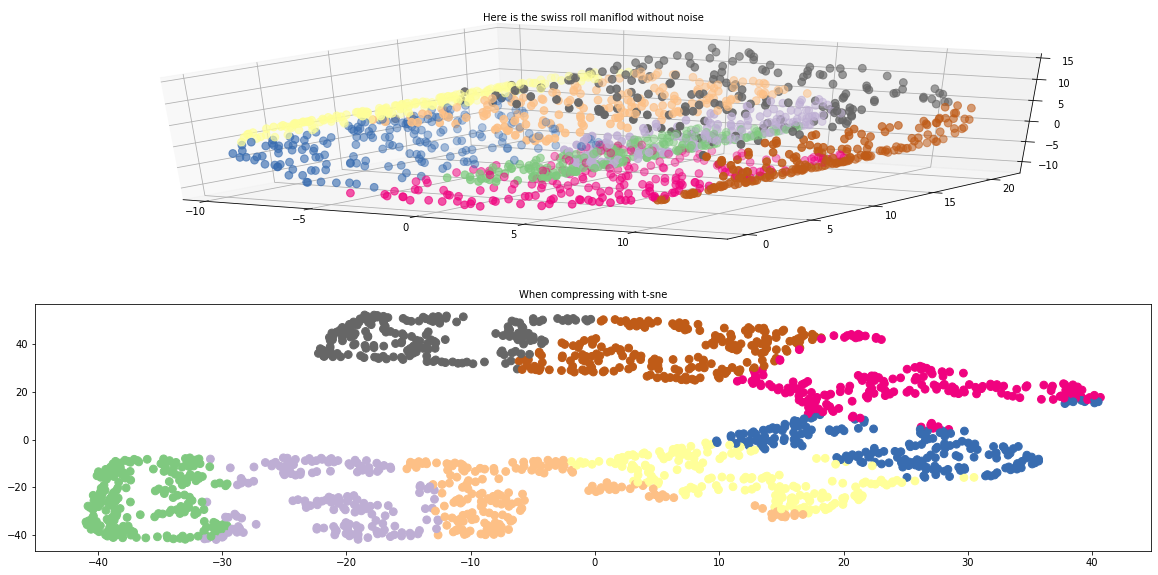

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod without noise', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color,cmap="Accent",s=60)# we are picking up the x,y,z co-ordinate values from dataset X
ax = fig.add_subplot(2, 1, 2) 

#Now we plot the 2D dimensionality reduced data using TSNE
ax.set_title('When compressing with t-sne', fontsize=10)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c = color,cmap="Accent",s=60)

#### Now let us generate swiss roll data for 300 samples with some noise in it

In [ ]:
''' make_swiss_roll allows you to pass range of noisy samples along with n_samples 
where the range of noise affects the variance around data samples'''
noise = 0.01*200 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)

#### Let's concatenate the noise data values and original data values

In [ ]:
import numpy as np
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)

In [ ]:
'''con_data has 300 additional samples that have been generated by make_swiss_roll with noise'''
### We create an object of Isomap class
### We are fitting and transforming the noisy data to t-SNE by calculating the joint probabilites between the data points
tsne_data = manifold.TSNE(n_components=2).fit_transform(con_data)

#### Let us plot the data. In this we are going to see two plots, first plot represents noisy swiss roll data with noise and the second plot represents the reduced noisy data (reduced by t-SNE)

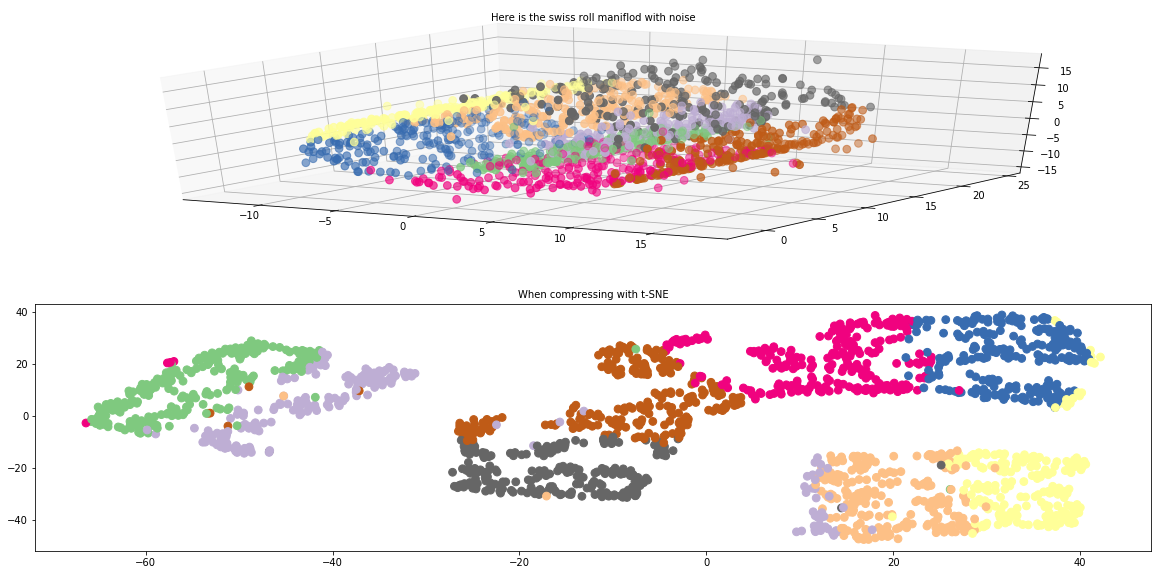

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
ax = fig.add_subplot(2, 1, 2) 

#2D Plot below
ax.set_title('When compressing with t-SNE', fontsize=10)
ax.scatter(tsne_data[:,0],tsne_data[:,1],c = con_colors,cmap="Accent",s=60)